In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing  = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y = pd.DataFrame(housing.target, columns=["target"])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [7]:
X.shape, y.shape

((20640, 8), (20640, 1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape, X_valid.shape, X_test.shape)

(13209, 8) (3303, 8) (4128, 8)


In [10]:
X_train.shape[1]

8

## Architecture USED : 

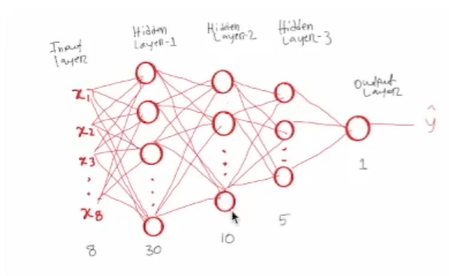

In [11]:
LAYERS = [
    tf.keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
]

C:\Users\abhishek.anand\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model  = tf.keras.Sequential(LAYERS)

In [13]:
LOSS = "mse"
OPTIMIZER = "sgd"

In [14]:
model.compile(loss=LOSS, optimizer=OPTIMIZER)

In [15]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
scaler = StandardScaler()

In [17]:
X_Train =  scaler.fit_transform(X_train)
X_Valid = scaler.transform(X_valid)
X_Test = scaler.transform(X_test)

In [18]:
EPOCHS = 20
history  = model.fit(X_Train, y_train, epochs=EPOCHS, validation_data=(X_Valid, y_valid))

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3927 - val_loss: 0.8176
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6264 - val_loss: 0.5757
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5770 - val_loss: 0.6143
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5187 - val_loss: 0.5150
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4472 - val_loss: 0.4640
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4074 - val_loss: 0.4268
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3872 - val_loss: 0.4033
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3697 - val_loss: 0.4030
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3589 - val_loss: 0.3865
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3502 - val_loss: 0.3764
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3429 - val_loss: 0.3674
Epoch 12/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [19]:
pd.DataFrame(history.history)

,loss,val_loss
0,1.392709,0.817576
1,0.626399,0.575694
2,0.576995,0.614315
3,0.518654,0.514991
4,0.447194,0.464039
5,0.407363,0.426766
6,0.387178,0.403273
7,0.369679,0.402957
8,0.358943,0.386549
9,0.350166,0.376425


Text(0.5, 0, 'Epochs')

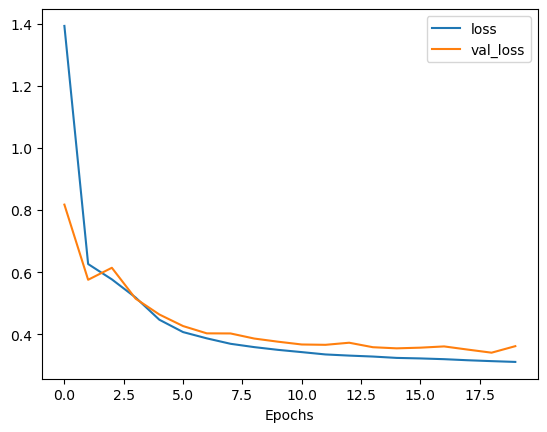

In [20]:
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")

In [21]:
model.evaluate(X_Test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3527


0.3526846170425415

In [22]:
new = X_Test[0]

In [23]:
new.shape

(8,)

In [24]:
X_Test[0]

array([-1.15763869, -0.28336379, -0.57962896, -0.18908216, -0.03070471,
        0.12364657,  0.19362619,  0.28590977])

In [25]:
new.reshape((1, 8)).shape

(1, 8)

In [26]:
model.predict(new.reshape((1, 8)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[0.41626978]], dtype=float32)

## Model with Callback Functions

In [27]:
model_2 = tf.keras.models.Sequential(LAYERS)

LOSS = "mse"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(loss=LOSS , optimizer=OPTIMIZER)

EPOCHS = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]


history = model_2.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_valid, y_valid), callbacks = CALLBACKS)

Epoch 1/20
391/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.6125

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12.8163 - val_loss: 2.8315
Epoch 2/20
405/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3927

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0686 - val_loss: 1.6440
Epoch 3/20
412/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5386

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4692 - val_loss: 1.4253
Epoch 4/20
410/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3426

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3541 - val_loss: 1.3867
Epoch 5/20
405/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3352

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3316 - val_loss: 1.3805
Epoch 6/20
380/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3297

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3269 - val_loss: 1.3800
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3261 - val_loss: 1.3803
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3259 - val_loss: 1.3805
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3259 - val_loss: 1.3804
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3259 - val_loss: 1.3805
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3259 - val_loss: 1.3806


In [28]:
%load_ext tensorboard

In [30]:
%tensorboard --logdir="logs"

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [31]:
#  pip install tensorboard